In [53]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")



In [54]:
fol="./UTKFace"

In [55]:
import os
files=os.listdir(fol)

In [56]:
ages=[]
genders=[]
imgs=[]

for i in files:
    t=fol+'/'+i
    img=cv2.imread(t)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(48,48))
    imgs.append(img)

In [57]:
for i in files:
    age=int(i.split('_')[0])
    gender=int(i.split('_')[1])
    ages.append(age)
    genders.append(gender)



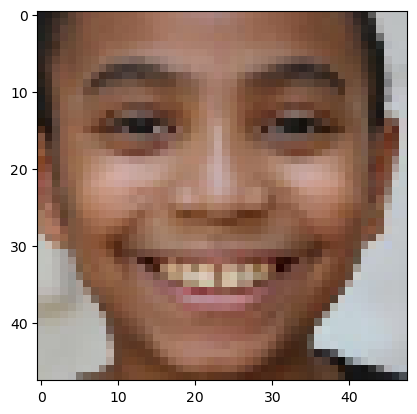

In [58]:
plt.imshow(imgs[87])

In [59]:
print(ages[87])
print(genders[87])

10
0


In [62]:
imgs_f=np.array(imgs)
ages_f=np.array(ages)
genders_f=np.array(genders)
np.save(fol+'imgs.npy',imgs_f)
np.save(fol+'ages.npy',ages_f)
np.save(fol+'genders.npy',genders_f)

In [63]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


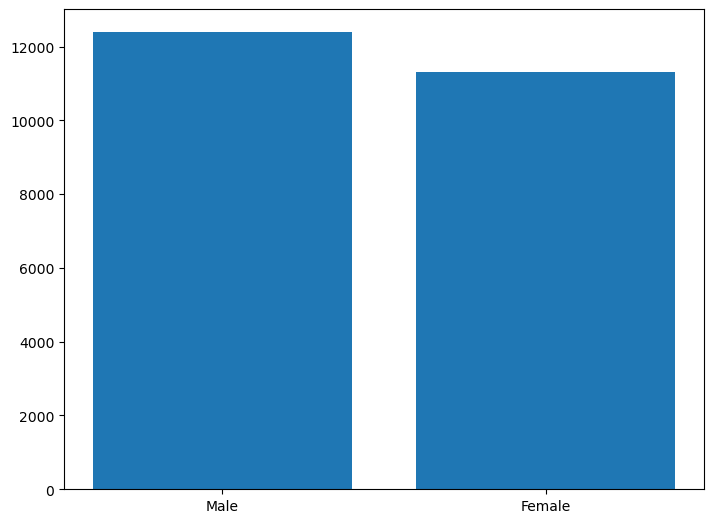

In [64]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
genders1=['Male','Female']
values=[12391, 11317]
ax.bar(genders1,values)
plt.show()

In [65]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


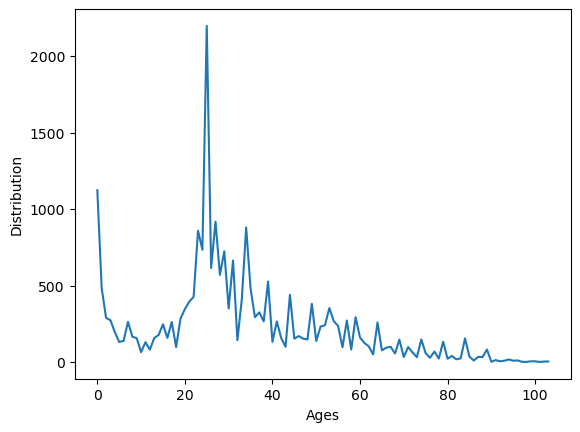

In [66]:
val=values.tolist()
cnt=counts.tolist()
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [67]:
print(len(ages))
print(len(genders))

23708
23708


In [68]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1
imgs_f2=imgs_f/255
print(imgs_f2.shape)    

(23708, 48, 48, 3)


In [69]:
print(len(imgs_f2))
labels_f=np.array(labels)
print(len(labels_f))
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(imgs_f2,labels_f,test_size=0.25)
print(Y_train[0:5])

23708
23708
[[31  1]
 [ 8  0]
 [31  1]
 [70  1]
 [92  1]]


In [70]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [71]:
from tensorflow.keras.layers import MaxPooling2D
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs, 32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu') (flatten)
    dense_2=Dense(64,activation ='relu') (flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid', name='sex_out') (drop_1)
    output_2=Dense(1,activation='relu', name='age_out') (drop_2)
    model=Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model


In [72]:
Model=model((48,48,3))

In [73]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [74]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss', verbose=1,save_best_only=True,save_weights_only=False,mode='auto', save_freq='epoch') 
Early_stop=tf.keras.callbacks. EarlyStopping(patience=75,monitor='val_loss', restore_best_weights='True') 
callback_list=[checkpoint, Early_stop]

In [75]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [77]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)


Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.2652 - sex_out_loss: 0.6903 - age_out_loss: 15.3956 - sex_out_accuracy: 0.5275 - age_out_accuracy: 0.0468
Epoch 1: val_loss improved from inf to 16.59979, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 30s 108ms/step - loss: 16.2652 - sex_out_loss: 0.6903 - age_out_loss: 15.3956 - sex_out_accuracy: 0.5275 - age_out_accuracy: 0.0468 - val_loss: 16.5998 - val_sex_out_loss: 0.6877 - val_age_out_loss: 15.7393 - val_sex_out_accuracy: 0.5266 - val_age_out_accuracy: 0.0489
Epoch 2/250


c:\Users\chsin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - ETA: 0s - loss: 13.0404 - sex_out_loss: 0.6266 - age_out_loss: 12.1993 - sex_out_accuracy: 0.6352 - age_out_accuracy: 0.0461
Epoch 2: val_loss improved from 16.59979 to 11.15131, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 31s 110ms/step - loss: 13.0404 - sex_out_loss: 0.6266 - age_out_loss: 12.1993 - sex_out_accuracy: 0.6352 - age_out_accuracy: 0.0461 - val_loss: 11.1513 - val_sex_out_loss: 0.5579 - val_age_out_loss: 10.3424 - val_sex_out_accuracy: 0.7361 - val_age_out_accuracy: 0.0489
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 10.9735 - sex_out_loss: 0.5523 - age_out_loss: 10.1446 - sex_out_accuracy: 0.7141 - age_out_accuracy: 0.0445
Epoch 3: val_loss did not improve from 11.15131
278/278 [==============================] - 31s 113ms/step - loss: 10.9735 - sex_out_loss: 0.5523 - age_out_loss: 10.1446 - sex_out_accuracy: 0.7141 - age_out_accuracy: 0.0445 - val_loss: 11.7872 - val_

In [68]:
#Model Evaluatin
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 2s 13ms/step - loss: 7.4864 - sex_out_loss: 0.2616 - age_out_loss: 6.2579 - sex_out_accuracy: 0.8883 - age_out_accuracy: 0.0452


[7.486410617828369,
 0.2615702450275421,
 6.257861137390137,
 0.8883077502250671,
 0.04521680623292923]

In [59]:
pred=Model.predict(X_test)

186/186 [==============================] - 5s 15ms/step


In [60]:
pred[1]

array([[48.17099 ],
       [38.590508],
       [40.51722 ],
       ...,
       [20.407227],
       [22.902231],
       [58.08851 ]], dtype=float32)

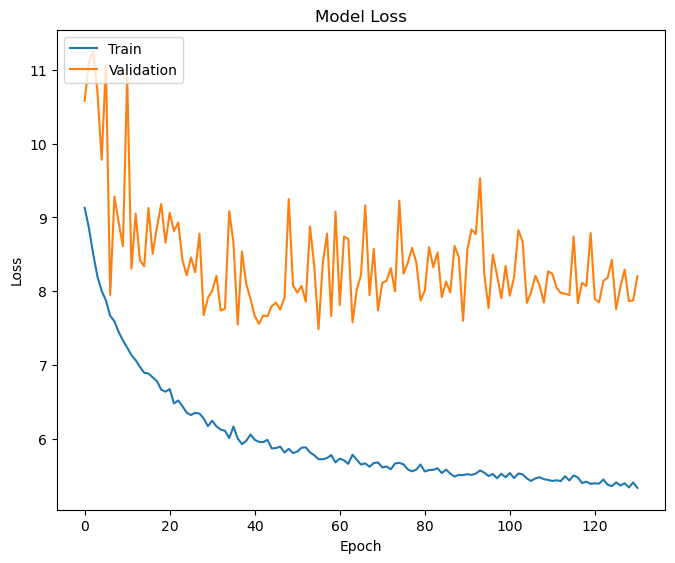

In [63]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

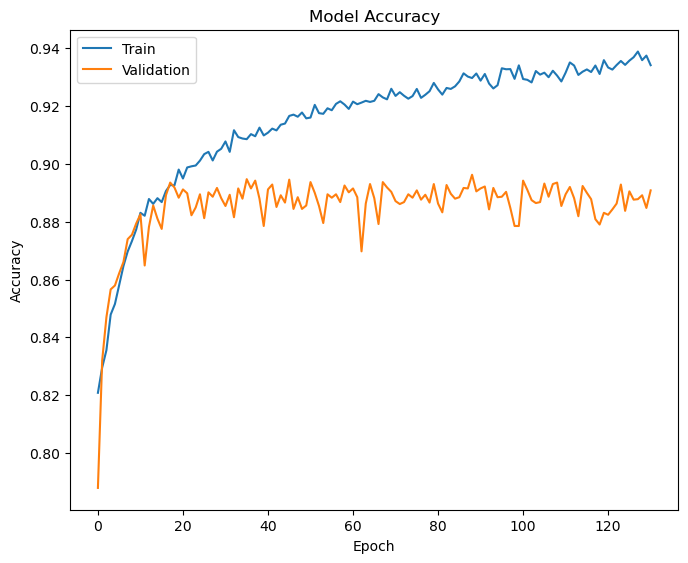

In [64]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

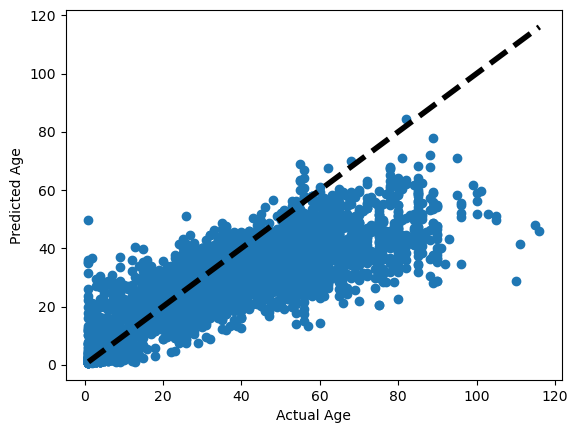

In [67]:
fig, ax=plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(),Y_test_2[1].max()], 'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [83]:
# MAking report of the model
i=0
Pred_1=[]
while(i<len(pred[0])):
    Pred_1.append(int(np.round(pred[0][i]))) 
    i=i+1

In [71]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [72]:
report=classification_report(Y_test_2[0], Pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      3076
           1       0.86      0.72      0.78      2851

    accuracy                           0.81      5927
   macro avg       0.82      0.81      0.81      5927
weighted avg       0.82      0.81      0.81      5927



In [77]:
results=confusion_matrix(Y_test_2[0],Pred_1)

<Axes: >

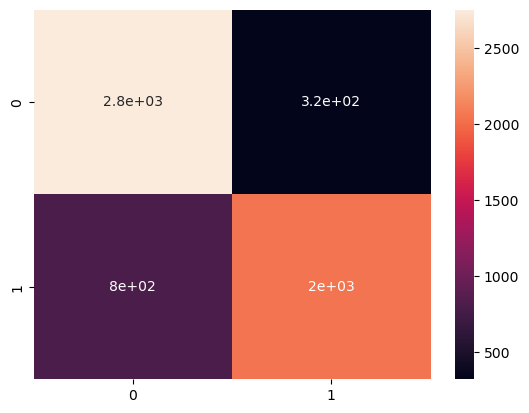

In [78]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [2]:
def test_image(ind,images_f,images_f_2, Model): 
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test])) 
    sex_f=['Male', 'Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

In [3]:
test_image(4,imgs_f,imgs_f2,Model)

NameError: name 'imgs_f' is not defined

1/1 [==============================] - 0s 31ms/step
Predicted Age is 11
Predicted Gender is Male


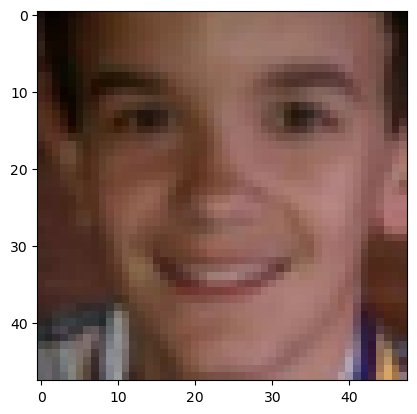

In [82]:
test_image(23,imgs_f,imgs_f2,Model)

1/1 [==============================] - 0s 23ms/step
Predicted Age is 25
Predicted Gender is Female


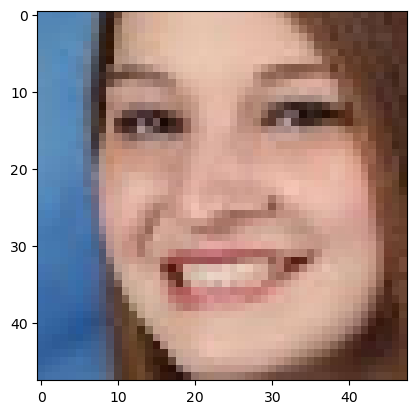

In [84]:
test_image(1288,imgs_f,imgs_f2,Model)